<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-1/blob/main/Ejemplo_4_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/ZahibVentura/Simulaci-n-1/blob/main/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

###Solución analítica

Como el ejercico pide calcular la probabilidad de que haya interferencia, en otras palabras se pide calcular la probabilidad de que la pieza $x_2$ no encaje adecuadamente en la pieza $x_1$.

Analicemos es punto de ver que hay interefencia, primero si $x_2 > x_1$ o que es lo mismo verlo como: $$x_2 - x_1 > 0$$
esto indica que el diametro de la flecha es más grande que el diametro del coginete.

Puesto que $x_2$ sigue la distribución con media y varianza siguiente: $ N(1.5,0.0016) $ mientras que $x_1$ sigue $N(1.48,0.0009)$.

Podemos calcular la distribución normal que sigue la diferencia $ x_2 - x_1 $, para esto es necesario el siguiente teorema:

**Suma de variables aleatorias normales independientes** \\
Si $X$ e $Y$ son dos variables aleatorias continuas independientes con densidades $g(x)$ y $h(y)$ respectivamente se puede probar que la variable aleatoria $Z= X+Y$ tiene densidad dada por:


$$ f_{X+Y}(z) = ∫_{-∞}^∞ g(z-y)h(y)dy $$
Si $X$ e $Y$ son variables aleatorias independientes donde $ X ∼ N(μ_x,σ_x^2)$ y $ Y ∼ N(μ_y,σ_y^2)$ entonces:
$$ X-Y  ∼ N(μ_{x-y},σ^2_{x+y})$$
De este teorema podemos obtener la media de la diferencia de las variables aleatorias y ademas la desviación estandar.

$$  E(X-Y) = \mu_x - \mu_y $$
$$ = 1.48 - 1.50 $$
$$ = -0.02 $$
ahora
$$ σ_{x+y} = (σ^2_x + σ^2_y)^{0.5} $$
$$ = (0.0016 + 0.0009)^{0.5} $$
$$ = 0.05 $$
Lo que queremos es: $P(x_2 - x_1>0) = 1-P(x_2 - x_1 ≤ 0)$. Estandarizamos esta probabilidad siendo $T = x_2 - x_1 = 0$
$$ z = (T-\mu_{x-y})/σ_{x-y} $$
$$ = ( 0 +0.02)/0.05 $$
$$ = 0.4 $$
Así que buscando en tablas de la normal la probabilidad $P(T\le 0) = 0.6554$

Por lo tanto
$$ P(x_2 - x_1 > 0 ) = 1 - P(x_2 - x_1 \le 0 )  $$
$$ = 1 - 0.6554$$
$$ = 0.3446 $$

Ahora para determinar el número de simulaciones necesarias, se requiere de la ecuación
$$ N > (2σz_{α/2} / ϵ)^{2}$$
si $ σ = 0.05$ y $ z_{α/2} = 1.96$
entonces
$$ N > ((2*0.05*1.96)/0.01)^{2} $$
$$ N > 384.16 $$
o lo que es: $ N=385 $

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt  #Importamos las librerias a ocupar
from scipy.stats import norm

In [2]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [3]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [4]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [5]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

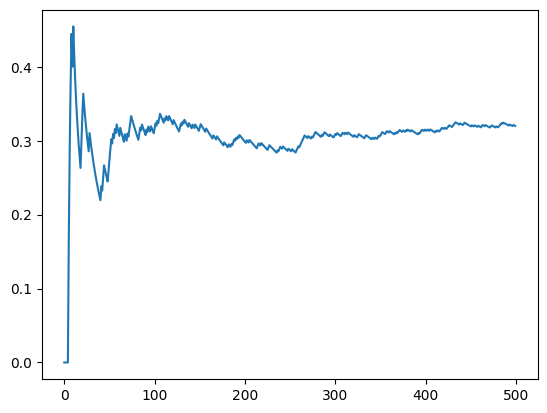

In [6]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [7]:
print(np.mean(X), np.std(X))  # Imprimimos de media de la lista X y su desviación estandar

0.3055707171352235 0.03749585073040216


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [8]:
def modelo(n): #Función que nos devolvera una lista con las medias de cada lista generada por la función
    lista=[]   # prob_inter() de 500 iteraciones
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [9]:
Y=modelo(120) #Se llama a la función modelo

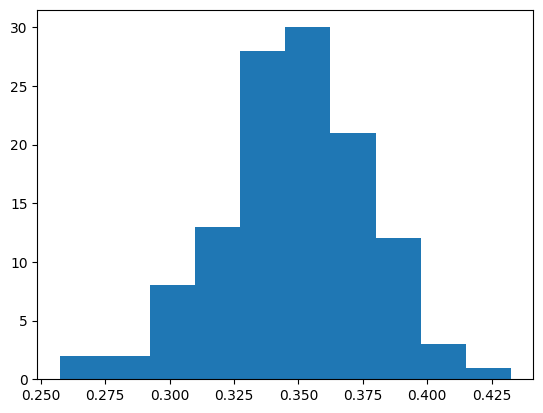

In [10]:
plt.hist(Y) #Muetra el histograma de la función modelo asignada ala variable Y
plt.show()

In [11]:
print(np.mean(Y), np.std(Y)) # Se calcula e imprime la media de la lista de medias así como la desviación estandar

0.34738649917948217 0.028688065875742075


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [12]:
np.mean(Y) #Se calcula la media de la lista de medias

0.34738649917948217

In [13]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) #Se calcula el intervalo de confinza donde se encuentra la media real de la población

(0.3394345730188956, 0.3553384253400687)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [14]:
N = (2*np.std(X)*1.96/0.01)**2 #Se calcula el numero de simulaciones con la ecuacion de arriba pero solo de la función prob_inter

In [15]:
print(N) #Imprimimos ese número

216.04218314328548


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

In [16]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [17]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

-0.002808240789806349